### Assignment 7 - Decision Tree

#### 1.
I chose the drug consumption dataset. It is a dataset of 1885 records that has features for demographic information (age, gender, education, country, ethnicity), NEO-FFI-R personality measures and degree of drug use (18 drugs spanning legal and illegal). I elected to use Education as the target of the decision tree. The data was categorical originally but presented as discrete real values. However, the drug use features use categorical labels. I chose this dataset because I wanted to learn whether demographic, drug use or personality traits were more or less important in determining your education history.

#### 2.
The dataset has no missing data. The features are discrete except for 18 drug use features where are categorical. The discrete features are unique real values that were originally categorical. See the below histograms on the Age distribution of the dataset and Chocolate(!) drug use after loading and labeling code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn import tree

In [2]:
data = pd.read_csv('drug_consumption.data', sep=",", header=None)
data.columns = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness", "Impulsiveness", "Sensation_Seeking", "Alcohol", "Amphetamine", "Amyl_Nitrite", "Benzos", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legal_high", "LSD", "Meth", "Mushrooms", "Nicotine", "Semeron", "Volatile_substance_abuse"]

In [3]:
# We don't need IDs and it would throw off the decision tree.
data = data.drop('ID', axis=1);

In [4]:
# Create dictionary so we can work with the weird discrete values the dataset has going on, giving it explanatory strings
#     for readability use in predictions
discrete_dict = {'-0.95197': '18-24', '-0.07854': '25-34', '0.49788': '35-44', '1.09449': '45-54', '1.82213': '55-64', '2.59171': '65+',
                 '0.48246': 'Female', '-0.48246': 'Male',
                 '-2.43591': 'Left school before 16 years', '-1.7379': 'Left school at 16 years', '-1.43719': 'Left school at 17 years',
                 '-1.22751': 'Left school at 18 years', '-0.61113': 'Some college', '-0.05921': 'Professional certificate/diploma',
                 '0.45468': 'University degree', '1.16365': 'Masters degree', '1.98437': 'Doctorate degree',
                 '-0.09765': 'Australia', '0.24923': 'Canada', '-0.46841': 'New Zealand',
                 '-0.28519': 'Other', '0.21128': 'Ireland', '0.96082': 'UK',
                 '-0.57009': 'USA', '-0.50212': 'Asian', '-1.10702': 'Black', '1.90725': 'Mixed-Black/Asian',
                 '0.126': 'Mixed-White/Asian', '-0.22166': 'Mixed-White/Black', '0.1144': 'Other',
                 '-0.31685': 'White'}

# Create another dictionary discretizing the dataset so the decision tree works
float_dict = {'18-24': 1.0, '25-34': 2.0, '35-44': 3.0, '45-54': 4.0, '55-64': 5.0, '65+': 6.0,
                 'Female' : 1.0, 'Male': 2.0,
                 'Left school before 16 years': 1.0, 'Left school at 16 years': 2.0, 'Left school at 17 years': 3.0,
                 'Left school at 18 years': 4.0, 'Some college': 5.0, 'Professional certificate/diploma': 6.0,
                 'University degree': 7.0, 'Masters degree': 8.0, 'Doctorate degree': 9.0,
                 'Australia': 1.0, 'Canada': 2.0, 'New Zealand': 3.0,
                 'Other': 4.0, 'Ireland': 5.0, 'UK': 6.0,
                 'USA': 7.0, 'Asian': 1.0, 'Black': 2.0, 'Mixed-Black/Asian': 3.0,
                 'Mixed-White/Asian': 4.0, 'Mixed-White/Black': 5.0, 'Other': 6.0,
                 'White': 7.0, 'CL0': 0, 'CL1': 1.0, 'CL2': 2.0, 'CL3': 3.0, 'CL4': 4.0, 'CL5': 5.0, 'CL6': 6.0}

In [5]:
# Change our columns to object type so replacements work
data = data.astype(str)
data.replace(discrete_dict, inplace=True)
data.replace(float_dict, inplace=True)

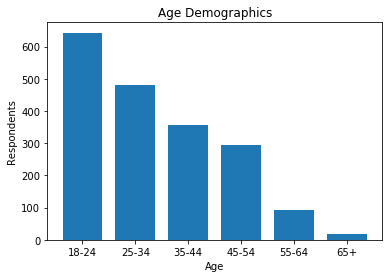

In [6]:
plt.figure();

plt.xticks( np.arange(1, 7, 1), ('18-24','25-34','35-44','45-54', '55-64', '65+') )
data['Age'].plot.hist(bins=np.arange(1, 8, 1)-0.5, rwidth=0.75)
plt.title('Age Demographics')
plt.ylabel('Respondents')
plt.xlabel('Age')

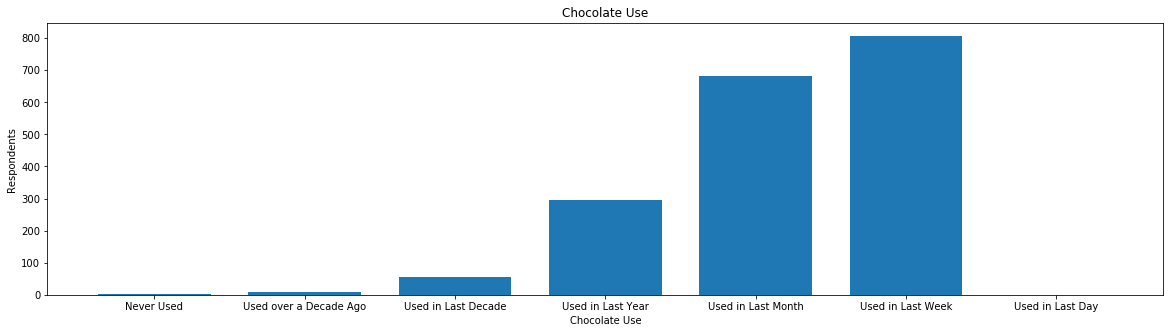

In [7]:
plt.figure(figsize=(20,5))

plt.xticks( np.arange(1, 8, 1), ('Never Used','Used over a Decade Ago','Used in Last Decade','Used in Last Year', 'Used in Last Month', 'Used in Last Week', 'Used in Last Day') )
data['Chocolate'].plot.hist(bins=np.arange(1, 9, 1)-0.5, rwidth=0.75)
plt.title('Chocolate Use')
plt.ylabel('Respondents')
plt.xlabel('Chocolate Use')

### 3.

In [8]:
target = data['Education']
data = data.drop('Education', axis=1);

In [9]:
clf = tree.DecisionTreeClassifier()
clf.fit(data, target);

In [13]:
col_names = list(data)
feature_names = np.asarray(col_names)
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': clf.feature_importances_})
feature_importance.sort_values('Importance', ascending=False)

,Feature,Importance
8,Conscientiousness,0.095454
4,Neuroticism,0.091343
0,Age,0.083319
5,Extraversion,0.075927
6,Openness,0.072101
7,Agreeableness,0.066675
10,Sensation_Seeking,0.043492
9,Impulsiveness,0.041152
27,Nicotine,0.038842
11,Alcohol,0.034920


#### 4.

In [24]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("drugs") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=col_names,
                         class_names=['Left school before 16 years', 'Left school at 16 years', 'Left school at 17 years',
                 'Left school at 18 years', 'Some college', 'Professional certificate/diploma',
                 'University degree', 'Masters degree', 'Doctorate degree'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [25]:
# Average / Professional certificate/diploma
clf.predict([[3.0, 1.0, 6.0, 4.0, '0.31287', '-0.57545', '-0.58331', '-0.91699',
        '-0.00665', '-0.21712', '-1.18084', 5.0, 2.0, 0.0, 2.0, 6.0, 0.0,
        5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0]])

array([ 6.])

In [30]:
# Highest top three most important traits = Master degree
clf.predict([[5.0, 1.0, 6.0, 4.0, '0.91093', '3.27393', '-0.58331', '-0.91699',
        '0.41594', '-0.21712', '-1.18084', 5.0, 2.0, 0.0, 2.0, 6.0, 0.0,
        5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0]])

array([ 8.])

In [29]:
# Highest top three most important traits + high Openness = University degree
clf.predict([[5.0, 1.0, 6.0, 4.0, '0.91093', '3.27393', '4.000', '-0.91699',
        '0.41594', '-0.21712', '-1.18084', 5.0, 2.0, 0.0, 2.0, 6.0, 0.0,
        5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0]])

array([ 7.])

#### 5.
The predictions make sense to me in that life long and/or semi-permanent personality traits in addition to age dominate the feature importance chart while drug use does not. Though drug use can be destructive and alter ones education trajectory, it does not play as bigger predictive role as wanting to do whats right/do a good job (Conscientiousness) or major anxiety or depression issues (Neuroticism) or time. One hypothesis is that drug use may be a less powerful force or a fleeting one, or both.

It did not surprise me that alcohol, nicotine and benzos had the most importance of the drug features. Neither did mushrooms low importance. It did surprise me that crack and heroin are toward the bottom for importance and that chocolate is featured so highly.